<center><a href="https://imgbb.com/"><img src="https://i.ibb.co/jv1S903/Hnet-com-image.png" alt="Hnet-com-image" border="0"></a></center>

<h1><center>M505: Pipeline for Machine Learning</center></h1>
<h5><center>Submitted by: Faiz Qureshi, GH1018786
<h5><center>Module Leader: Prof. Mohammad Mahdavi

![Cover Image](https://thumbs.dreamstime.com/z/weather-forecast-meteorological-map-australia-realistic-synoptic-aditable-generic-showing-isobars-fronts-142506578.jpg)

<h1><center>Will it rain in Australia tomorrow?</center></h1>

# Table of contents

- <a href='#1'>Context </a> 
- <a href='#2'>Problem Statement </a> 
- <a href='#3'>Data Exploration </a> 
- <a href='#4'>Data Preparation </a> 
- <a href='#5'>Modeling </a>
- <a href='#6'>Model Assessment </a> 
- <a href='#7'>Feature Importance Analysis </a> 
- <a href='#8'>Conclusion </a>
- <a href='#8'>References </a>


# <a id='1'> Context <a>


I work for The Weather Company. Historically, we have used numerical forecasting to predict upcoming weather. These techniques rely on gathering current atmoshpheric measurements as an input to mathematical models which provide a prediction, which is then screened by a human.

With the advent of machine learning and the massive amounts of compute power now in our hands, the company wishes to augment it's old mathematical models with new-age machine learning models. In essence, ML models also rely on statistics, but they are much easier to tune and it only takes a fraction of the time to create and compare many different models. 

The task at hand is to create a ML model which can augment the existing models. The way our company makes profit is to sell accurate weather data and build products around it. Naturally, by improving the speed, accuracy and reliability of our models we will be able to draw greater profits.



# <a id='2'>Problem Statement <a>


As a pilot project, we are need to predict whether it will rain in a specific region of Australia tomorrow. We have a dataset with historical data about Australian weather. It has more than 145,000 rows with different atmospheric readings, as well as the dates when these were taken. Finally, there's a column which tells whether it rained on the next day. Using this data, we wish to create a ML model which can augment (and maybe in time, replace) our current prediction systems, to make them more accurate, reliable and robust.

The task is a classification problem with the target being a binary label which answers the question - 'Will it rain in this part of Australia tomorrow?'

We will try 3 classifiers from SKLearn - DecisionTree, LogisticRegression and SVC.
For the classifier which looks most promising, we will tune the hyperparameters, then test it on an unseen dataset to see how it performs.


# <a id='3'> Data Exploration <a>


#### Import required packages

In [1]:
# Utilities 
import os

# Data handling
import numpy as np
import pandas as pd

# Machine Learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Model Assessment
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Librarires for plotting data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#### Load and check the dataset

In [2]:
os.getcwd()

'/home/faizmohammedqureshi/Assessments'

In [3]:
data_path = '/home/faizmohammedqureshi/Assessments/Datasets/weatherAUS.csv'
df = pd.read_csv(data_path)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Loading is successful, now we will explore the data.

In [4]:
df.shape

(145460, 23)

In [5]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

The data has a mixture of numerical and categorical values. Many columns have data missing data. We will need to adress this before modeling.

One thing that immediately stands out is that some rows have the target label missing. We will not be able to use these rows.

### Target Variable
Our target variable for prediction will be 'RainTomorrow', so let us have a closer look at it first

In [7]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

We will define a small helper function to pretty print and return a dictionary of mpercentage of missing values in the specified columns of. a dataframe. we will use it later as well.

In [8]:
def pct_missing_vals(df, columns=None):
    pct_missing_dict = {}
    columns = df.columns if not columns else columns
    for column in columns:
        pct_missing = round(100 * df[column].isnull().mean(), 2)
        pct_missing_dict[column] = pct_missing
        print(f'{pct_missing}% values are missing for {column}')
    val_sorted_dict = {k: v for k, v in sorted(pct_missing_dict.items(), key=lambda x: x[1], reverse=True)}
    return val_sorted_dict

In [9]:
pct_missing_vals(df, ['RainTomorrow']);

2.25% values are missing for RainTomorrow


Since this is the target variable, we will simply remove the rows without a a value, since these are basically useless to us.

In [10]:
df = df[df['RainTomorrow'].notnull()]
pct_missing_vals(df, ['RainTomorrow']);

0.0% values are missing for RainTomorrow


Now, let us see how the values in this column are distributed. This is important to know before splitting into testing and training. Using this information, we can perform a stratified split if needed.

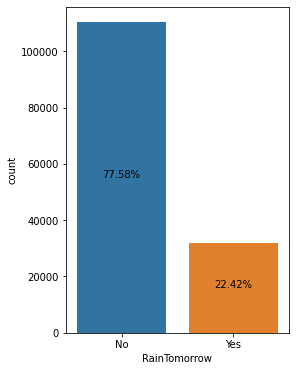

In [11]:
f, ax = plt.subplots(figsize=(4, 6))
ax = sns.countplot(x="RainTomorrow", data=df)

# Annotate with percentage of values at center of bar
for patch in ax.patches:
    percentage = '{:.2f}%'.format(100 * patch.get_height()/len(df))
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()/2
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

As we can see, our classes are imbalanced. This is somewhat expected since in most cities we have more non-rainy days than rainy days, each year. We might need to address this later.

### Split the data
Before further exploration, we will split our data into train and test sets. The obsrvations we make from this point forward will only be about the train set. The test set will only be used to assess our model at the end. Doing this ensures that we are as close to the real-life scenario as possible and can also avoid overfitting.

When we engineer our data, we will fit our transformations only on the training set. For example, if we are replacing a missing value with a median, the median will be of the training set only. The transformation however, will then be applied to both training and testing data. This way, we are not gaining additional information from "unseen" examples in the test set.

In [12]:
target_lbl = 'RainTomorrow'
y = df[target_lbl]
X = df.drop(target_lbl, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

for data in [X_train, y_train, X_test, y_test]:
    print(data.shape)

(113754, 22)
(113754,)
(28439, 22)
(28439,)


### Other Variables

Now let us consider the remaining variables. Further exploration will only be done on the training data.

First we will explore categorical, then numerical ones.

In [13]:
# Get list of columns categorical and numerical columns
cols_categorical = [col for col in X_train.columns if X_train[col].dtype=='O']
cols_numerical = [col for col in X_train.columns if X_train[col].dtype!='O']

#### Categorical columns

In [14]:
X_train[cols_categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
18401,2009-10-14,NorahHead,SSW,NW,W,No
127797,2011-09-26,Walpole,WSW,WNW,W,Yes
40012,2010-04-20,Williamtown,ENE,W,E,No
130914,2011-07-12,Hobart,WNW,WNW,WNW,No
41742,2015-04-13,Williamtown,S,SW,SSE,No


In [15]:
X_train[cols_categorical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113754 entries, 18401 to 124925
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         113754 non-null  object
 1   Location     113754 non-null  object
 2   WindGustDir  106296 non-null  object
 3   WindDir9am   105718 non-null  object
 4   WindDir3pm   110731 non-null  object
 5   RainToday    112572 non-null  object
dtypes: object(6)
memory usage: 6.1+ MB


In [16]:
pct_missing_vals(X_train[cols_categorical]);

0.0% values are missing for Date
0.0% values are missing for Location
6.56% values are missing for WindGustDir
7.06% values are missing for WindDir9am
2.66% values are missing for WindDir3pm
1.04% values are missing for RainToday


No missing values in 'Date', 'Location' and 'RainTomorrow'.
Rest all columns have some missing values. We will adress this later on.

Let us check the cardinality of these columns. This is important to check, since very high cardinality can have adverse effects on our ML models.

In [17]:
for col in cols_categorical:
    print(f'{len(X_train[col].unique())} unique values in {col}')

3409 unique values in Date
49 unique values in Location
17 unique values in WindGustDir
17 unique values in WindDir9am
17 unique values in WindDir3pm
3 unique values in RainToday


As seen, most columns have acceptable cardinality here. Only exception is 'Date'. We will transform it during Feature Engineering.

Finally, let's have a look at the value counts for each categorical column.

In [18]:
for col in cols_categorical:
    print(X_train[col].value_counts(), '\n')


2016-10-27    46
2015-07-14    45
2016-08-03    45
2014-01-08    45
2017-02-13    45
              ..
2007-12-04     1
2008-01-03     1
2008-01-17     1
2008-04-22     1
2008-01-14     1
Name: Date, Length: 3409, dtype: int64 

Canberra            2738
Sydney              2628
Hobart              2560
Brisbane            2557
Darwin              2555
Perth               2549
Adelaide            2500
Mildura             2439
Launceston          2439
Tuggeranong         2431
Bendigo             2418
PerthAirport        2417
Albany              2416
Ballarat            2411
Woomera             2410
MountGambier        2405
AliceSprings        2404
Witchcliffe         2404
Sale                2403
Townsville          2403
MelbourneAirport    2398
Albury              2395
Penrith             2392
CoffsHarbour        2391
Nuriootpa           2390
Cobar               2387
Portland            2386
GoldCoast           2384
Watsonia            2381
NorfolkIsland       2378
WaggaWagga          23

Nothing here really stands out. Let us move on to Numerical variables.

#### Numerical columns

In [19]:
X_train[cols_numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
18401,15.1,23.9,0.0,NaN,NaN,67.0,19.0,22.0,38.0,68.0,1001.9,1002.4,NaN,NaN,19.8,14.3
127797,9.7,14.2,7.6,NaN,NaN,50.0,15.0,28.0,91.0,56.0,1008.2,1007.7,NaN,NaN,11.1,13.4
40012,13.2,25.4,0.0,3.2,8.8,30.0,6.0,17.0,79.0,63.0,1025.2,1021.5,6.0,5.0,21.2,24.0
130914,7.6,14.8,0.0,4.0,7.0,94.0,30.0,35.0,52.0,45.0,1004.6,1001.4,NaN,NaN,11.1,12.9
41742,12.9,22.2,0.0,4.0,7.9,37.0,15.0,20.0,69.0,52.0,1023.0,1021.2,6.0,2.0,18.8,20.6


In [20]:
X_train[cols_numerical].tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
112920,9.0,18.9,12.6,NaN,NaN,43.0,20.0,15.0,NaN,NaN,1017.5,1017.7,NaN,NaN,15.8,17.6
122810,13.1,19.9,3.0,1.2,2.3,39.0,2.0,13.0,90.0,55.0,1018.1,1018.2,7.0,7.0,15.4,19.1
106280,10.8,25.5,0.0,12.0,13.0,44.0,26.0,15.0,41.0,21.0,1015.7,1012.6,0.0,0.0,15.3,23.1
135107,11.3,21.4,0.0,NaN,NaN,39.0,19.0,22.0,75.0,79.0,NaN,NaN,8.0,4.0,15.8,15.7
124925,10.3,28.1,0.0,NaN,NaN,46.0,15.0,13.0,51.0,28.0,NaN,NaN,NaN,NaN,19.7,26.7


In [21]:
pct_missing_vals(X_train[cols_numerical]);

0.46% values are missing for MinTemp
0.24% values are missing for MaxTemp
1.04% values are missing for Rainfall
42.89% values are missing for Evaporation
47.77% values are missing for Sunshine
6.51% values are missing for WindGustSpeed
0.95% values are missing for WindSpeed9am
1.85% values are missing for WindSpeed3pm
1.25% values are missing for Humidity9am
2.56% values are missing for Humidity3pm
9.9% values are missing for Pressure9am
9.87% values are missing for Pressure3pm
37.84% values are missing for Cloud9am
40.23% values are missing for Cloud3pm
0.65% values are missing for Temp9am
1.94% values are missing for Temp3pm


All columns have some missing values.
Particularly, 'Evaporation', 'Sunshine', 'Cloud3pm' and 'Cloud9am' have a lot of missing values. We will address these issues later on.

For now, let us check how the values in these columns are distributed.

In [22]:
print(round(X_train[cols_numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  113229.0  113486.0  112572.0      64963.0   59409.0       106348.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      112671.0      111645.0     112334.0     110841.0     102497.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

From a quick glance, we can see that some of these columns are likely to have outliers.
In particular, 'Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm' and 'WindGustSpeed' have very high max values, compared to their mean and medians.


Let us explore further by using boxplots.

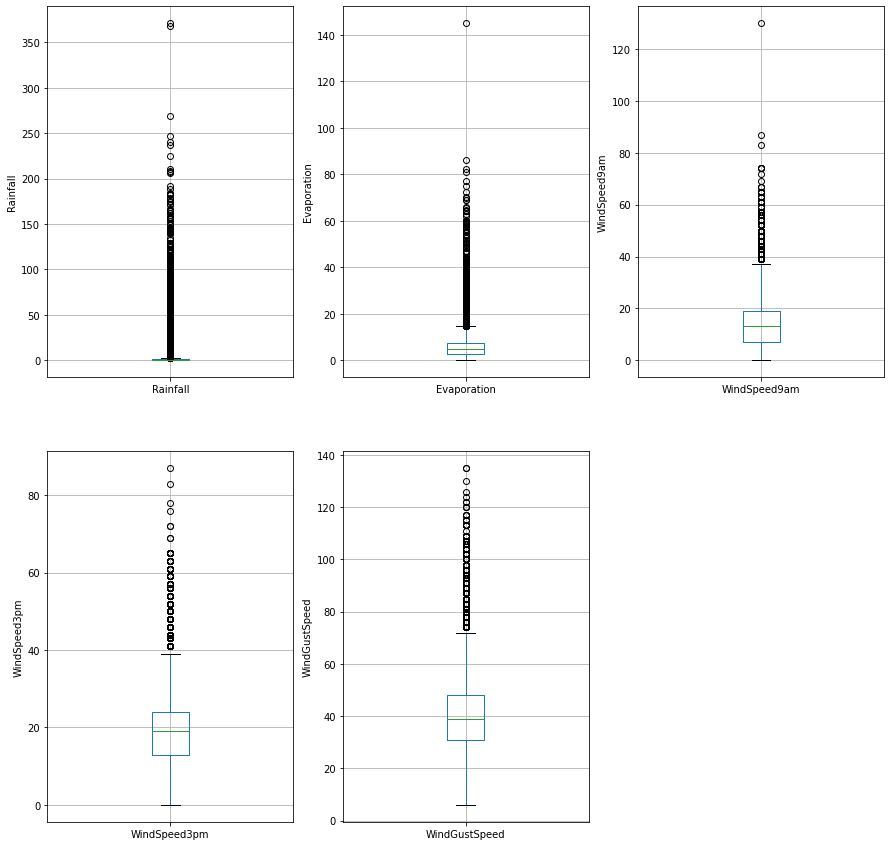

In [23]:
cols_with_outliers = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed']

plt.figure(figsize=(15, 15))

i = 1
for col in cols_with_outliers:
    plt.subplot(2, 3, i)
    fig = X_train.boxplot(column=col)
    fig.set_title('')
    fig.set_ylabel(col)
    i += 1

From the boxplots above, we can see that indeed, there are many outliers. Especially for 'Rainfall' and 'Evaporation'.

Additionally, let us check the value distribution of these columns, so we can create a strategy for removing outliers.

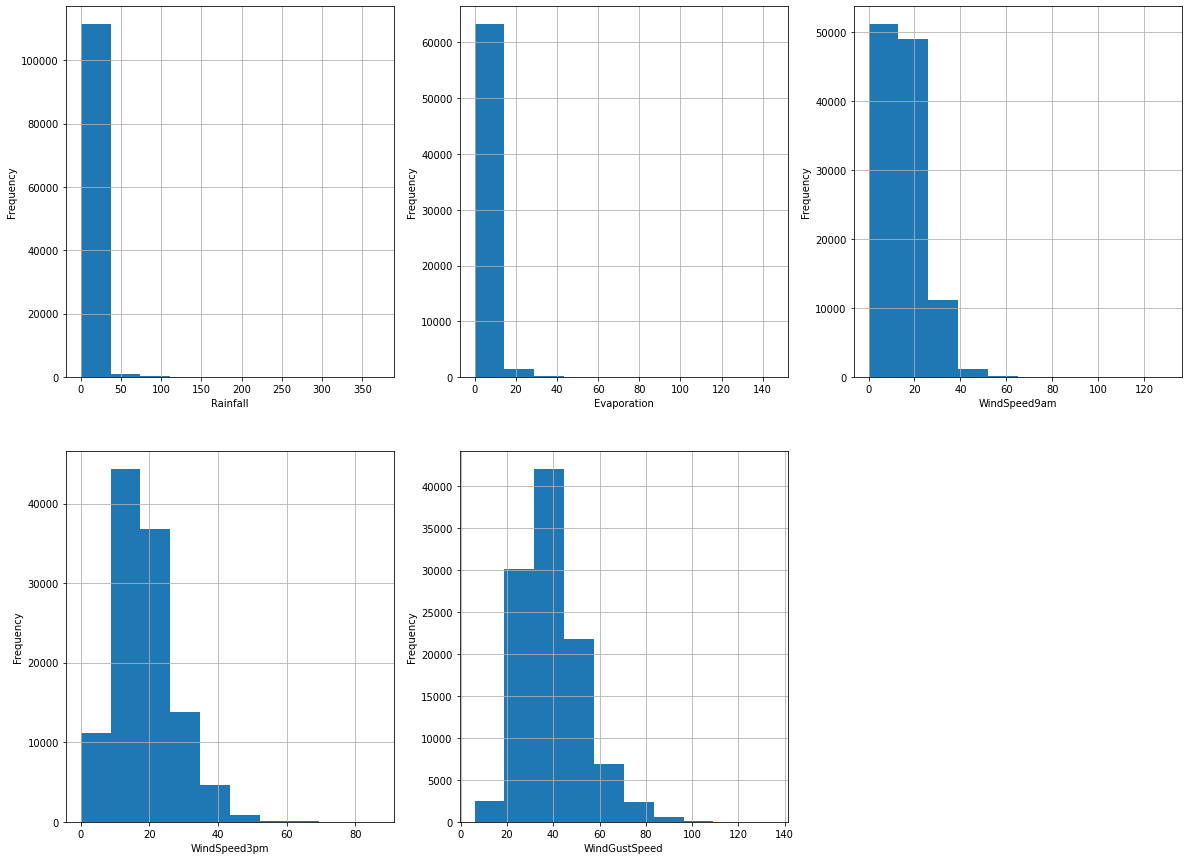

In [24]:
plt.figure(figsize=(20, 15))

i = 1
for col in cols_with_outliers:
    plt.subplot(2, 3, i)
    fig = X_train[col].hist()
    fig.set_xlabel(col)
    fig.set_ylabel('Frequency')
    i += 1

All of these columns, especially 'Rainfall' and 'Evaporation' are right skewed. We can use 3 x IQR to remove outliers. 

#### Correlation between variables

To further understand the relationships between variables, let us plot a correlation heatmap.

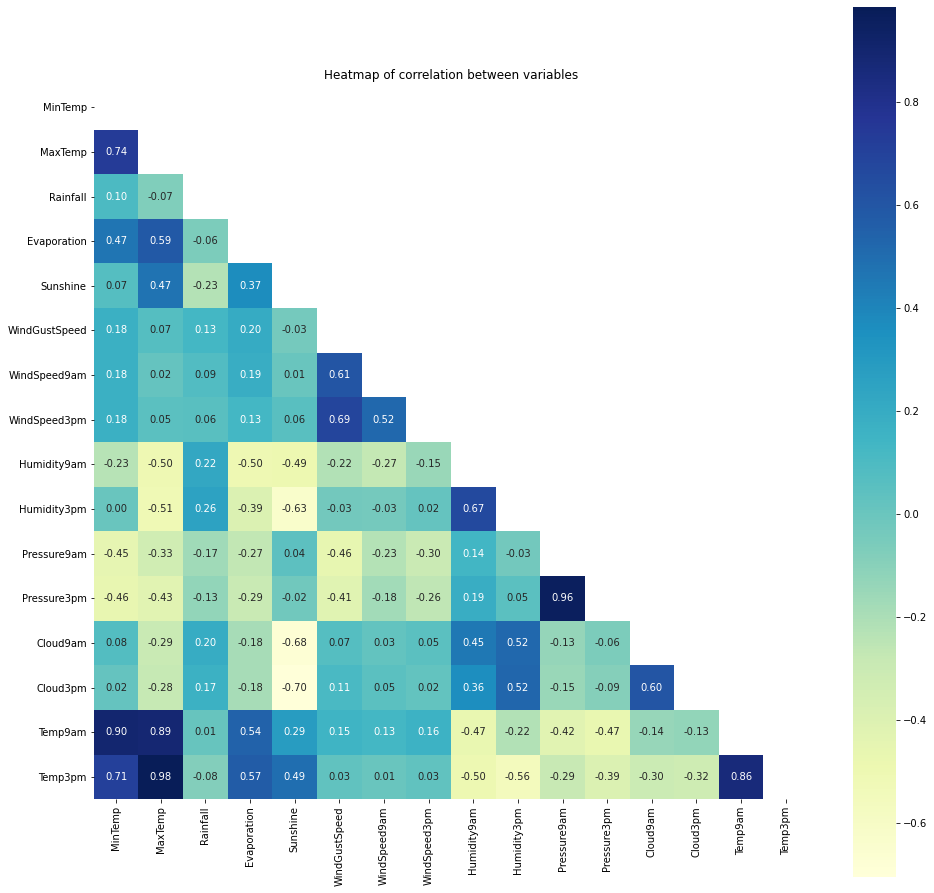

In [25]:
correlation = X_train.corr()

plt.figure(figsize=(16, 16))
plt.title('Heatmap of correlation between variables')

# Use a mask to only plot lower triangle
mask=np.triu(correlation)
ax = sns.heatmap(correlation, mask=mask, square=True, annot=True, fmt='0.2f', cmap='YlGnBu')

# Rotate the x axis labels to make room
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)         
plt.show()

<center>From the heatmap, we can identify the following columns with high positive correlation<center>

| Col1| Col2 | Corr |
| --- | --- | --- |
| Temp3pm | MaxTemp | 0.98 |
| Pressure9am | Pressure3pm | 0.96 |
| Temp9am | MinTemp | 0.90 |
| Temp9am | MaxTemp | 0.89 |
| Temp9am | Temp3pm | 0.86 |
| MaxTemp | MinTemp | 0.74 |
| Temp3pm | MinTemp | 0.71 |

Let us further visualize the relationships between some of these, using a pairplot.


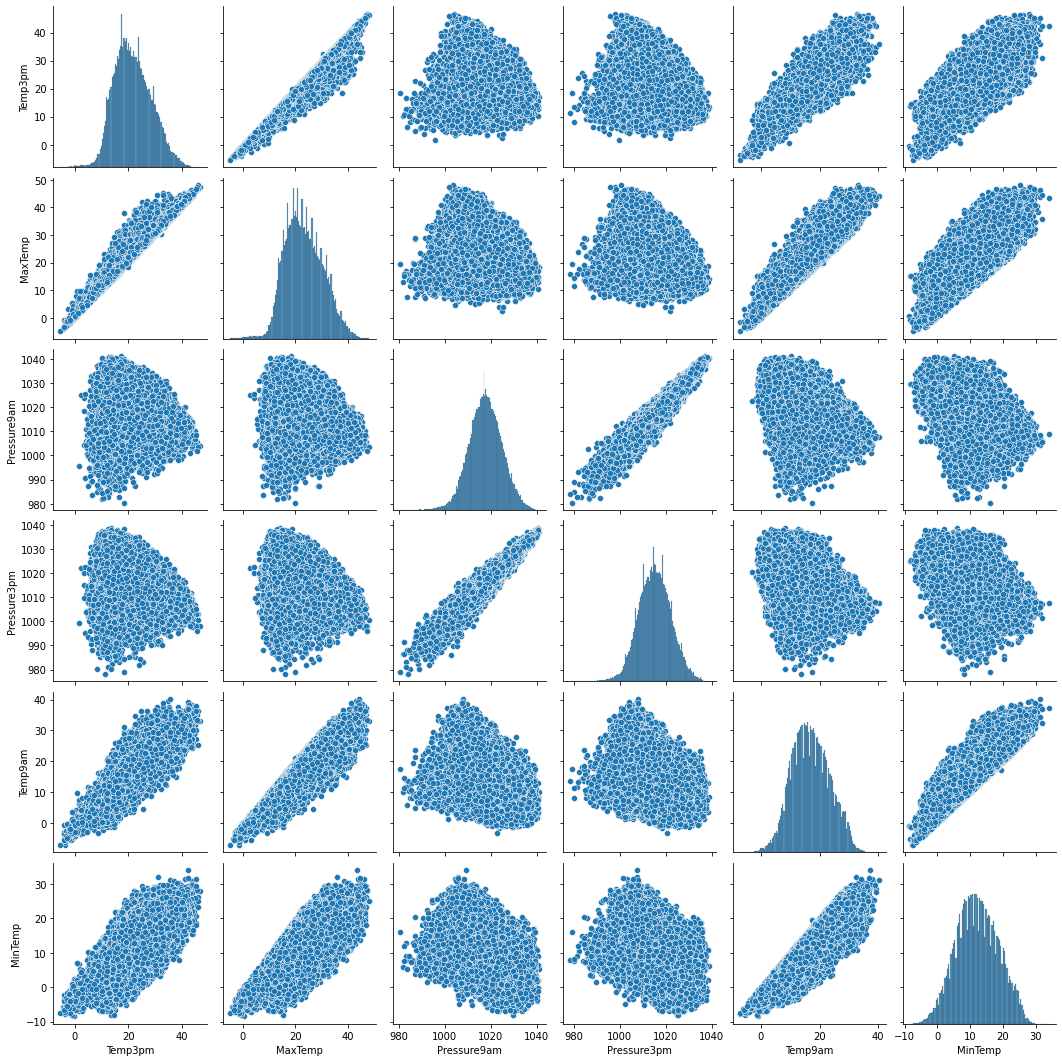

In [26]:
cols_correlated = ['Temp3pm', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'MinTemp']

sns.pairplot(X_train[cols_correlated], kind='scatter')
plt.show()

From this, we can see that many of these columns exhibit an almost linear relationship with each other. We will use this fact during feature engineering.


# <a id='4'> Data Preparation <a>


In this section, we will transform the data based on our exploration above. We will try to address some the issues that we noticed about the data make it ready for our model.

### Feature Selection

From correlation analysis, we noticed that some columns are very highly correlated. Intuitively too, this makes sense. For example, 'MaxTemp' will be highly correlated with 'Temp3pm' since around 3pm is when the highest temperature is usually recorded.

In other words, when one of these features is present, the other one doesnt provide us much additional information. Since there is usually a tradeoff between model performance and number of features, it makes sense for us to only select one of these.

Thus, we will remove the following features, since other features are more or less conveying the same information.

In [28]:
cols_to_drop = ['Temp3pm', 'Temp9am', 'Pressure3pm']
X_train = X_train.drop(cols_to_drop, axis=1)
X_test = X_test.drop(cols_to_drop, axis=1)

X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday
18401,2009-10-14,NorahHead,15.1,23.9,0.0,NaN,NaN,SSW,67.0,NW,W,19.0,22.0,38.0,68.0,1001.9,NaN,NaN,No
127797,2011-09-26,Walpole,9.7,14.2,7.6,NaN,NaN,WSW,50.0,WNW,W,15.0,28.0,91.0,56.0,1008.2,NaN,NaN,Yes
40012,2010-04-20,Williamtown,13.2,25.4,0.0,3.2,8.8,ENE,30.0,W,E,6.0,17.0,79.0,63.0,1025.2,6.0,5.0,No
130914,2011-07-12,Hobart,7.6,14.8,0.0,4.0,7.0,WNW,94.0,WNW,WNW,30.0,35.0,52.0,45.0,1004.6,NaN,NaN,No
41742,2015-04-13,Williamtown,12.9,22.2,0.0,4.0,7.9,S,37.0,SW,SSE,15.0,20.0,69.0,52.0,1023.0,6.0,2.0,No


### Handling Missing Data

We will assume that the data that is missing is missing complete at random - there is no pattern to the missing data. A measure of central tendency like mean, median or mode can be used to replace these values.

For numerical columns, we will use the median value  as a replacement as it is a bit more robust than mean or mode.

For categorical columns, mean or median are readily available, so we will use the mode as a replacement.

In [29]:
# Get list of columns categorical and numerical columns again
cols_categorical = [col for col in X_train.columns if X_train[col].dtype=='O']
cols_numerical = [col for col in X_train.columns if X_train[col].dtype!='O']

# For numerical
for column in cols_numerical:
    median = X_train[column].median()
    X_train[column].fillna(median, inplace=True)
    X_test[column].fillna(median, inplace=True)

# For categorical
for column in cols_categorical:
    mode = X_train[column].mode()[0]
    X_train[column].fillna(mode, inplace=True)
    X_test[column].fillna(mode, inplace=True)


In [30]:
pct_missing_vals(X_train);

0.0% values are missing for Date
0.0% values are missing for Location
0.0% values are missing for MinTemp
0.0% values are missing for MaxTemp
0.0% values are missing for Rainfall
0.0% values are missing for Evaporation
0.0% values are missing for Sunshine
0.0% values are missing for WindGustDir
0.0% values are missing for WindGustSpeed
0.0% values are missing for WindDir9am
0.0% values are missing for WindDir3pm
0.0% values are missing for WindSpeed9am
0.0% values are missing for WindSpeed3pm
0.0% values are missing for Humidity9am
0.0% values are missing for Humidity3pm
0.0% values are missing for Pressure9am
0.0% values are missing for Cloud9am
0.0% values are missing for Cloud3pm
0.0% values are missing for RainToday


### Outlier Removal

To recall, the following columns have outliers.

In [31]:
cols_with_outliers

['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed']

In [32]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.175225,23.221349,2.323285,5.183036,7.993989,39.895063,13.984704,18.633252,68.839434,51.480317,1017.646309,4.647652,4.701452
std,6.384019,7.109859,8.425833,3.213743,2.758049,13.127684,8.842558,8.709156,18.944168,20.531492,6.750345,2.292660,2.118964
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,3.000000,4.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,5.000000,5.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,6.000000,6.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,8.000000,9.000000


- We will use IQR to identify the outliers.
- Looking at the values before, we could see that most probably these outliers are not due to recording error.
- These may very well be valid values, especially since this data was recorded over a number of years.
- For example, a Rainfall value of 300mm in some city in Australia is definitely possible.
- Our issue with these outliers is that they can decrease the robustness of the model.
- They can also cause scaling issues if we want to standardize the values in these columns.
- With these factors in mind, we will use a more lenient ```5 x IQR``` (on each side) as our outlier boundary.
- We will use the value of our outlier boundary to replace the outlier values.

In [33]:
for col in cols_with_outliers:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    bounds = (Q1 - 5 * IQR, Q3 + 5 * IQR)
    X_train[col] = X_train[col].apply(lambda x: bounds[0] if x < bounds[0] else x )
    X_train[col] = X_train[col].apply(lambda x: bounds[1] if x > bounds[1] else x )

X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.175225,23.221349,0.733853,5.051698,7.993989,39.894650,13.984150,18.633147,68.839434,51.480317,1017.646309,4.647652,4.701452
std,6.384019,7.109859,1.308116,2.453168,2.758049,13.124961,8.837151,8.708384,18.944168,20.531492,6.750345,2.292660,2.118964
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,3.000000,4.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,5.000000,5.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,6.000000,6.000000
max,33.900000,48.100000,3.600000,12.400000,14.500000,121.000000,79.000000,79.000000,100.000000,100.000000,1041.000000,8.000000,9.000000


### Feature Engineering

In this section, we will further transform and encode our categorical data.

#### Date

As observed above the issue with date is that it has a very high cardinality. Moreover, we might not be gaining much meaning information from the year in each date, since rains tend to be seasonal and do not vary as much year to year.

Our approach will thus be to split the 'Date' column into month and day of month. We will ignore the year.

In [34]:
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_test['Date'] = pd.to_datetime(X_test['Date'])


In [35]:
# Extract month and day of month
X_train['Month'] = X_train['Date'].dt.month
X_test['Month'] = X_test['Date'].dt.month

X_train['Day'] = X_train['Date'].dt.day
X_test['Day'] = X_test['Date'].dt.day

X_train = X_train.drop('Date', axis=1)
X_test = X_test.drop('Date', axis=1)

X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Month,Day
18401,NorahHead,15.1,23.9,0.0,4.8,8.4,SSW,67.0,NW,W,19.0,22.0,38.0,68.0,1001.9,5.0,5.0,No,10,14
127797,Walpole,9.7,14.2,3.6,4.8,8.4,WSW,50.0,WNW,W,15.0,28.0,91.0,56.0,1008.2,5.0,5.0,Yes,9,26
40012,Williamtown,13.2,25.4,0.0,3.2,8.8,ENE,30.0,W,E,6.0,17.0,79.0,63.0,1025.2,6.0,5.0,No,4,20
130914,Hobart,7.6,14.8,0.0,4.0,7.0,WNW,94.0,WNW,WNW,30.0,35.0,52.0,45.0,1004.6,5.0,5.0,No,7,12
41742,Williamtown,12.9,22.2,0.0,4.0,7.9,S,37.0,SW,SSE,15.0,20.0,69.0,52.0,1023.0,6.0,2.0,No,4,13


#### Label encoding for 'RainToday' and 'RainTomorrow'

For the binary valued columns we will do a simple transormation from Yes/No to 1/0


In [36]:
remap = dict(Yes=1, No=0)


X_train['RainToday'] = X_train['RainToday'].replace(remap)
X_test['RainToday'] = X_test['RainToday'].replace(remap)


y_train = y_train.replace(remap)
y_test = y_test.replace(remap)

In [37]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Month,Day
18401,NorahHead,15.1,23.9,0.0,4.8,8.4,SSW,67.0,NW,W,19.0,22.0,38.0,68.0,1001.9,5.0,5.0,0,10,14
127797,Walpole,9.7,14.2,3.6,4.8,8.4,WSW,50.0,WNW,W,15.0,28.0,91.0,56.0,1008.2,5.0,5.0,1,9,26
40012,Williamtown,13.2,25.4,0.0,3.2,8.8,ENE,30.0,W,E,6.0,17.0,79.0,63.0,1025.2,6.0,5.0,0,4,20
130914,Hobart,7.6,14.8,0.0,4.0,7.0,WNW,94.0,WNW,WNW,30.0,35.0,52.0,45.0,1004.6,5.0,5.0,0,7,12
41742,Williamtown,12.9,22.2,0.0,4.0,7.9,S,37.0,SW,SSE,15.0,20.0,69.0,52.0,1023.0,6.0,2.0,0,4,13


In [38]:
y_train = y_train.replace('Yes',0)
y_train.head()

18401     0
127797    1
40012     0
130914    0
41742     0
Name: RainTomorrow, dtype: int64

#### One-hot encoding of other categorical variables

We will use one-hot encoding since the data in these columns is not ordinal.

In [39]:
cols_categorical = [col for col in X_train.columns if X_train[col].dtype=='O']

X_train = X_train.reset_index()
X_test = X_test.reset_index()

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train[cols_categorical])
enc_cols = enc.get_feature_names(cols_categorical)

enc_df_train = pd.DataFrame(enc.transform(X_train[cols_categorical]).toarray(), columns=enc_cols)
enc_df_test = pd.DataFrame(enc.transform(X_test[cols_categorical]).toarray(), columns=enc_cols)

X_train = X_train.join(enc_df_train).drop(cols_categorical, axis=1)
X_test = X_test.join(enc_df_test).drop(cols_categorical, axis=1)


In [40]:
X_train.shape, X_test.shape

((113754, 114), (28439, 114))

In [41]:
X_train.head()

,index,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,18401,15.1,23.9,0.0,4.8,8.4,67.0,19.0,22.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,127797,9.7,14.2,3.6,4.8,8.4,50.0,15.0,28.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,40012,13.2,25.4,0.0,3.2,8.8,30.0,6.0,17.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,130914,7.6,14.8,0.0,4.0,7.0,94.0,30.0,35.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,41742,12.9,22.2,0.0,4.0,7.9,37.0,15.0,20.0,69.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
X_train = X_train.drop('index', axis=1)
X_test = X_test.drop('index', axis=1)


### Feature Scaling

Scaling our numerical values can often have a positive effect on model performance and accuracy. SKLearn provides an easy way to do this. We will use the MinMaxScaler to scale values between 0 and 1.

In [43]:
cols = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.487623,0.529704,0.203848,0.407395,0.551310,0.294736,0.177015,0.235863,0.688394,0.514803,...,0.05431,0.059699,0.067567,0.101183,0.065114,0.056534,0.064481,0.069562,0.060763,0.065694
std,0.150566,0.134402,0.363366,0.197836,0.190210,0.114130,0.111863,0.110233,0.189442,0.205315,...,0.22663,0.236929,0.251002,0.301573,0.246728,0.230952,0.245609,0.254409,0.238896,0.247748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.322581,0.565517,0.217391,0.088608,0.164557,0.570000,0.370000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.483491,0.517958,0.000000,0.387097,0.579310,0.286957,0.164557,0.240506,0.700000,0.520000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.596698,0.623819,0.166667,0.435484,0.600000,0.347826,0.240506,0.303797,0.830000,0.650000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Class Imbalance

As we had observed earlier, our target class is skewed towards observation with no rain tomorrow. It is almost always a good idea to resolve this by oversampling the minorty class, or providing adding weights to the classes during modeling.

All of SKLearn's classification models provide ways to mitigate class imbalance. Usually class weight can be fixed by either proving these weights explicitly, or by asking the model to balance the classes automatically depending on the number of observations from each class in the training set. This is the reason we do not need to oversample our minorty class right now.

Our data is now ready to be modeled.


# <a id='5'> Modeling <a>


In [44]:
for data in [X_train, X_test, y_train, y_test]:
    print(data.shape)

(113754, 113)
(28439, 113)
(113754,)
(28439,)


### Model Selection

To start our modeling, we will try out a few models from SKLearn. Based on an initial rough idea about the accuracy, we will pick one model and tune the hyperparameters using GridSearchCV.

We will try out the out-of-the-box LogitsitcRegression, SVC and RandomForest classifier.. This will give us a quick and rough idea about model performance. Then, we will pick one of the promising models and tune its hyperparameters to get the best out of it.

In [45]:
# DecisionTree classifier
clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
roc_auc_score(y_test, y_preds), accuracy_score(y_test, y_preds)

(0.6924251769251019, 0.7855409824536728)

In [46]:
# LogiticRegression classifier
clf = LogisticRegression(random_state=0, class_weight='balanced')
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
roc_auc_score(y_test, y_preds), accuracy_score(y_test, y_preds)

(0.7749225400710679, 0.7748162734273357)

In [47]:
# RandomForest classifier
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)
roc_auc_score(y_test, y_preds), accuracy_score(y_test, y_preds)

(0.7193994903835418, 0.8515770596715777)

From this, we can see that RandomForest might be a good classifier. Being an ensemble model, it benefits when there is a large dataset, by providing more robust predictions.

### Hyperparamer Tuning

The documentation for SKLearn's RandomForest Classifier lists many hyperparameters. Some of these are:


``n_estimators``: The number of Decision Trees in the Random Forest

``max_depth``: The maximum depth of each of the Decision Trees. A value too small may cause underfitting while a very large values are prone to overfitting.

``criterion``: The measure ('gini' or 'entropy') for judging the quality of a split.

``max_features``: The number of features used to get the best split.

``min_samples_leaf``: The minimum number of samples required in a leaf node.


We will consider n_estimators, max_depth and criterion for tuning. Additionally, we will use roc_score as our scoring metric and use the deafult 5-fold cross validation scheme. We will set n_jobs to -1 to use all available compute power, since this Grid Search can be a time consuimg task.


In [49]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(class_weight='balanced', random_state=0)
parameters = {'max_depth':[5, 30, 100, 200, 300], 
              'n_estimators':[5, 15, 50, 100, 200], 
              'criterion':['gini', 'entropy'],
             }
clf = GridSearchCV(rfc, parameters, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 30, 100, 200, 300],
                         'n_estimators': [5, 15, 50, 100, 200]},
             scoring='roc_auc')

In [50]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 100, 'n_estimators': 200}

In [51]:
clf.cv_results_

{'mean_fit_time': array([ 0.88589931,  1.9371984 ,  5.50848379,  9.96139631, 22.40892501,
         2.55232878,  6.7558166 , 19.6976151 , 38.21014595, 82.4694828 ,
         2.40579748,  6.90274949, 21.12642517, 43.64669561, 82.80845637,
         2.40825467,  6.28204675, 20.73152094, 42.04711938, 79.56208367,
         2.21677938,  6.5191915 , 20.43291936, 40.32245312, 77.80578232,
         0.68766847,  2.02976241,  5.06916347, 10.92937989, 22.33752117,
         2.41683125,  6.8495378 , 21.53675799, 42.25988512, 72.63774137,
         2.40377622,  6.50308938, 21.72421894, 41.51895523, 70.38542309,
         2.31050186,  6.26396422, 22.82333908, 42.09217076, 66.88781486,
         2.4875174 ,  7.04239063, 21.09132676, 32.74242549, 58.18975625]),
 'std_fit_time': array([0.02778373, 0.14091024, 0.84711979, 0.49306062, 1.34706125,
        0.19777316, 0.6359971 , 1.02051681, 1.77469709, 2.52466481,
        0.15586941, 0.91353112, 0.66061015, 4.22674842, 3.11523763,
        0.25204998, 0.47480049,

Grid search has provided us with a lot of data, including the best params: ```{'criterion': 'entropy', 'max_depth': 100, 'n_estimators': 200}```

We can also check the scores and training time for each of the 20 RandomForest classifiers it has created.


# <a id='7'> Model Assessment <a>


In [52]:
y_preds = clf.predict(X_test)
accuracy_score(y_test, y_preds), roc_auc_score(y_test, y_preds)

(0.8529484159077323, 0.7219686862048997)

The accuracy score of our model on the completely unseen test set was 85%. Additionally the ROC score is 73%. Let us visualise the ROC curve.

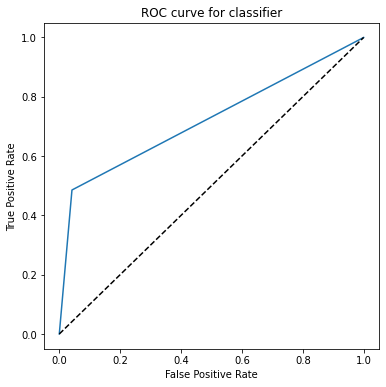

In [53]:
# Get false positive rate, true positive rate 
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

# Plot it
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.rcParams['font.size'] = 12

plt.show()

The ROC curve tells us about the trade-off between True Positive Rate (Sensitivity) and False Positive Rate (Lack of Specificty).
A classifier making random prediction will have a score of around 0.50 and is represented by the dotted line. Our classier is represented by the blue line and it performs much better than the baseline.


Let also check the confusion matrix to see the type 1 and type 2 erros our classifier is making.

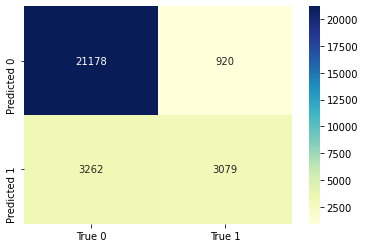

In [54]:
# Get the matrix
cm = confusion_matrix(y_test, y_preds)

# Convert to DF
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_preds),
                           columns=['True 0', 'True 1'],
                           index=['Predicted 0', 'Predicted 1'])

# Plot heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu');

From this heatmap, we can see that most of the error are happening when our classifier is predicting rain even when there is actually no rain. To improve our model performance, we should try to address this in the future. For weather reporting, false prediction of rain is not as bad as reporting that there won't be rain when there actually is. This is because people often rely on rain prediction to prepare themselves (carry an umbrella, leave early for work etc.)


# <a id='7'> Feature Importance Analysis <a>
    


A downside of using the Random Forest classifier is that as more and more decision trees are added, measuring the importance of each feature for a prediction becomes convoluted. 

That being said, SKLearn provides `RandomForestClassifier.feature_importances_` attribute, which we can use to visualize the importance.


First, we need to re-create an instance of RandomForestClassifier with the tuned hyperparameters. 

In [56]:
clf = RandomForestClassifier(n_estimators=200, max_depth=100, 
                             criterion='entropy', class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, n_estimators=200)

Now we visualize feature importance

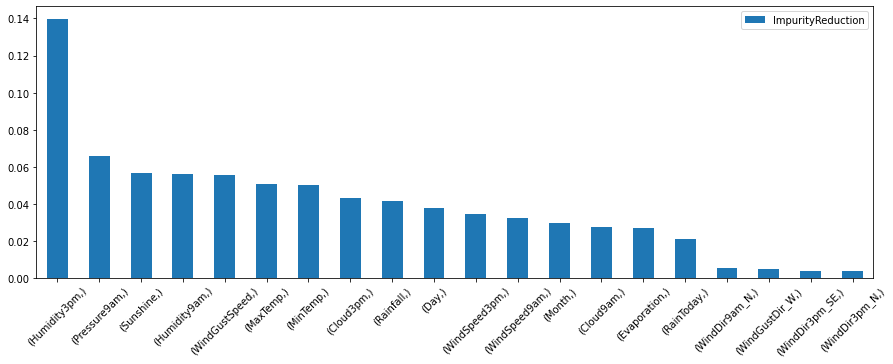

In [59]:
# Create a dict of feature and its importance to be used for plotting
fi_dict = {}
for feature, importance in zip(X_train.columns, clf.feature_importances_):
    fi_dict[feature] = importance

# Dict to df
importances = pd.DataFrame.from_dict(fi_dict, orient='index').rename(columns={0: 'ImpurityReduction'})

# Sort and get top 20 - more than 20 wouldn't look good on graph
importances = importances.sort_values(by='ImpurityReduction', ascending=False)[:20]

# Plot with 45 deg rotated labels
importances.plot(kind='bar', figsize=(15, 5), rot=45);

From the plot, we can see that the contribution of each feature to the decrease in class impurity. This clearly shows that 'Humidity3pm', 'Sunshine' and 'Pressure3pm' are most important features for this model. The majority of our 118 features contribute less than 0.02.


# <a id='10'>Conclusion <a>


**Limitations**
- The false positive rate is a bit high and ROC-AUC score is on the lower side, though it's possible that that's because of the data and not the model.
- RandomForest Classifiers are much slower to fit the data and predict on it, since it is an ensemble model and requires multiple decision trees to be trained under the hood.
- Due to the same reason RandomForest models are not very explainable
- The pipeline has room for further improvements by analyzing the features at a deeper level and re-engineering them, particularyly to decrease false positives



**Summary**
The data at hand had over 145k rows. There were 23 columns, 7 of which were categorical and the rest were numerical. The data was fairly noisy - it had missing values, many outliers and many columns were correlated with each other. The target class distribution was skewed as well - there were  only 23% cases for minority class (RainTomorrow=yes). Fortunately almost all classifiers in SKLearn provide an option of weighing classes. Using this, we were able to ensure that our classifier is more robust. Through a combination of feature engineering, ensemble learning and hyperparameter tuning, we could achieve an accuracy of over 85% and an ROC-AUC score of 0.78

While these are not stellar numbers, this is acceptable for the given data, since weather data is known to be noisy and atmospheric changes are volatile and quite hard to predict. Our accuracy score on training set was 88% and on the testing set it was about 85%. This shows there is a lack of evidence of under or over-fitting.

By using this model, The Weather Company should be able to make better predictions about the possibility of rain tomorrow in many cities of Australia. This will drive better profits for them since better predictions equal higher market share in the weather prediction industry. 


# <a id='9'>References <a>


**Dataset Source**: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

**Cover Image**: https://thumbs.dreamstime.com/z/weather-forecast-meteorological-map-australia-realistic-synoptic-aditable-generic-showing-isobars-fronts-142506578.jpg

**SKLearn documentation**: https://scikit-learn.org/stable/user_guide.html

**Class imbalance**: https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b